# Introduction

We are going to implement linear regression with differnt methods using Medical cost data.
dataset can be downloaded from [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance/code?select=insurance.csv)

# Data Preprocessing

In [51]:
# Import all the libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
df.info()
# NO missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
# handle categorical dataset
categorical_cols = [col for col in df.columns if df[col].dtype=='object']  + ['children']
categorical_cols

['sex', 'smoker', 'region', 'children']

In [56]:
num_cols = [col for col in df.columns if df[col].dtype in ('float64', 'int64')]
num_cols

['age', 'bmi', 'children', 'charges']

In [57]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='charges'>

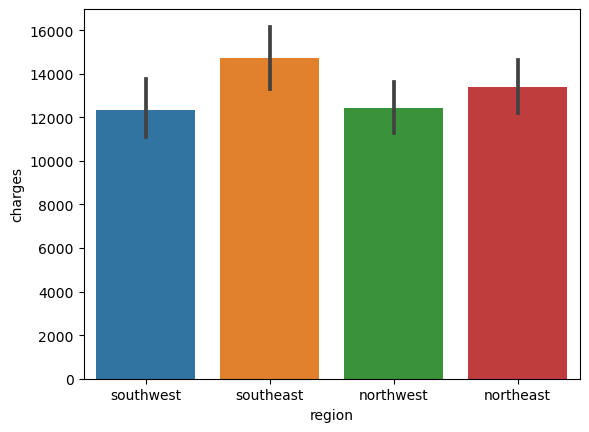

In [58]:
sns.barplot(df, x='region', y='charges')

In [59]:
# divide data into test and train
from sklearn.model_selection import train_test_split

# remove target (y) from dataset
X = df.drop(['charges'], axis=1)
y = df.charges

# stratifying with sex to avoid baising
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=X.sex,
                                                    test_size=0.2, 
                                                    random_state=42 
                                                )


In [60]:
y.shape

(1338,)

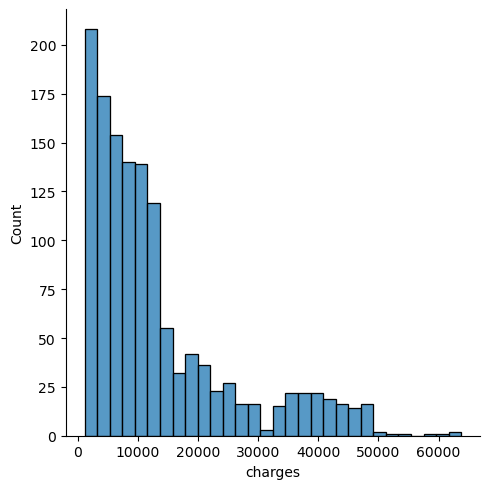

In [61]:
sns.displot(df.charges)


## Discover and Visualize the Data to Gain Insights use only train dataset

In [62]:
corr_matrix = df.corr()

In [63]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [64]:
categorical_cols

['sex', 'smoker', 'region', 'children']

In [65]:
# Handle categorical columns/features
encoded_X_train_df = pd.get_dummies(data=X_train, prefix='OHO', prefix_sep='_', columns=categorical_cols, drop_first=True)
encoded_X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 242 to 1304
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1070 non-null   int64  
 1   bmi            1070 non-null   float64
 2   OHO_male       1070 non-null   uint8  
 3   OHO_yes        1070 non-null   uint8  
 4   OHO_northwest  1070 non-null   uint8  
 5   OHO_southeast  1070 non-null   uint8  
 6   OHO_southwest  1070 non-null   uint8  
 7   OHO_1          1070 non-null   uint8  
 8   OHO_2          1070 non-null   uint8  
 9   OHO_3          1070 non-null   uint8  
 10  OHO_4          1070 non-null   uint8  
 11  OHO_5          1070 non-null   uint8  
dtypes: float64(1), int64(1), uint8(10)
memory usage: 35.5 KB


In [66]:
# Handle categorical columns/features
encoded_X_test_df = pd.get_dummies(data=X_test, prefix='OHO', prefix_sep='_', columns=categorical_cols, drop_first=True)
encoded_X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 1155 to 277
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            268 non-null    int64  
 1   bmi            268 non-null    float64
 2   OHO_male       268 non-null    uint8  
 3   OHO_yes        268 non-null    uint8  
 4   OHO_northwest  268 non-null    uint8  
 5   OHO_southeast  268 non-null    uint8  
 6   OHO_southwest  268 non-null    uint8  
 7   OHO_1          268 non-null    uint8  
 8   OHO_2          268 non-null    uint8  
 9   OHO_3          268 non-null    uint8  
 10  OHO_4          268 non-null    uint8  
 11  OHO_5          268 non-null    uint8  
dtypes: float64(1), int64(1), uint8(10)
memory usage: 8.9 KB


In [67]:
# scale all the columns to convert them into same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train_df = scaler.fit_transform(encoded_X_train_df)
scaled_X_train_df

array([[ 1.12829229, -0.65294162, -1.01127855, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [-1.17538857, -1.24367712, -1.01127855, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 1.63222248,  1.48969846,  0.98884723, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       ...,
       [ 0.19242194, -0.40652985,  0.98884723, ...,  2.77474089,
        -0.12706042, -0.1192393 ],
       [ 0.6243621 , -0.57705985, -1.01127855, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 0.19242194, -1.01113621,  0.98884723, ..., -0.36039401,
        -0.12706042, -0.1192393 ]])

In [68]:
scaled_X_test_df = scaler.transform(encoded_X_test_df)

# Linear Regression Explaination with Equations

## Lineare Regression Implementation using Normal Equation

The normal equation is $\mathbf{\theta = (X^T X)^{-1} X^Ty}$ \
Where, $\hat{\theta}$ is the value of $\theta$ to minimize the cost function \
       $y$ is the vector of target value \
       $X$ is the features
       

In [69]:
from sklearn.preprocessing import add_dummy_feature
# add x0 = 1 to each instance
X_train_b = add_dummy_feature(scaled_X_train_df)
X_train_b

array([[ 1.        ,  1.12829229, -0.65294162, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 1.        , -1.17538857, -1.24367712, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 1.        ,  1.63222248,  1.48969846, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       ...,
       [ 1.        ,  0.19242194, -0.40652985, ...,  2.77474089,
        -0.12706042, -0.1192393 ],
       [ 1.        ,  0.6243621 , -0.57705985, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 1.        ,  0.19242194, -1.01113621, ..., -0.36039401,
        -0.12706042, -0.1192393 ]])

In [70]:
X_test_b = add_dummy_feature(scaled_X_test_df)
X_test_b

array([[ 1.        , -0.23951822, -1.41420711, ...,  2.77474089,
        -0.12706042, -0.1192393 ],
       [ 1.        ,  0.40839202, -0.04996713, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 1.        , -1.5353387 ,  0.98708372, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       ...,
       [ 1.        , -1.39135865, -0.11197804, ..., -0.36039401,
        -0.12706042,  8.38649708],
       [ 1.        , -0.95941849, -1.39870439, ..., -0.36039401,
        -0.12706042, -0.1192393 ],
       [ 1.        , -1.24737859, -1.06090812, ..., -0.36039401,
        -0.12706042, -0.1192393 ]])

In [71]:
# put values in normalize equation
theta_best = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
theta_best

array([13232.52058373,  3402.38937477,  1994.72786225,   -64.44968435,
        9653.42808779,  -212.6977235 ,  -511.90274669,  -479.49200339,
         128.52096334,   742.76220361,   295.40661939,   379.00261393,
         172.970735  ])

In [72]:
y_predict_nor_eq = X_test_b @ theta_best

In [73]:
# The parameters for linear regression model

parameters = [f'theta_{theta}' for theta in range(X_train_b.shape[1])]
parameters

['theta_0',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10',
 'theta_11',
 'theta_12']

In [74]:
columns = ['intersect:x_0=1'] + list(encoded_X_test_df.columns.values)
columns

['intersect:x_0=1',
 'age',
 'bmi',
 'OHO_male',
 'OHO_yes',
 'OHO_northwest',
 'OHO_southeast',
 'OHO_southwest',
 'OHO_1',
 'OHO_2',
 'OHO_3',
 'OHO_4',
 'OHO_5']

In [75]:
parameters_df = pd.DataFrame({'Parameter':parameters, 'Columns': columns, 'theta_best':theta_best})
parameters_df

,Parameter,Columns,theta_best
0,theta_0,intersect:x_0=1,13232.520584
1,theta_1,age,3402.389375
2,theta_2,bmi,1994.727862
3,theta_3,OHO_male,-64.449684
4,theta_4,OHO_yes,9653.428088
5,theta_5,OHO_northwest,-212.697724
6,theta_6,OHO_southeast,-511.902747
7,theta_7,OHO_southwest,-479.492003
8,theta_8,OHO_1,128.520963
9,theta_9,OHO_2,742.762204


In [76]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train_df,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.


LinearRegression()

In [77]:
lin_reg_model_predicted = lin_reg.predict(scaled_X_test_df)

In [78]:
#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameters_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta_best,Sklearn_theta
0,theta_0,intersect:x_0=1,13232.520584,13232.520584
1,theta_1,age,3402.389375,3402.389375
2,theta_2,bmi,1994.727862,1994.727862
3,theta_3,OHO_male,-64.449684,-64.449684
4,theta_4,OHO_yes,9653.428088,9653.428088
5,theta_5,OHO_northwest,-212.697724,-212.697724
6,theta_6,OHO_southeast,-511.902747,-511.902747
7,theta_7,OHO_southwest,-479.492003,-479.492003
8,theta_8,OHO_1,128.520963,128.520963
9,theta_9,OHO_2,742.762204,742.762204


### Mean Square Error

* Lesser the MSE -> Smaller is the error -> Better the estimator

$ MSE = ({1 \over n}) \sum(Actual - Predicted)^2$

where,
* n = sample size 
* actual = the actual data value (labels) 
* predicted = the predicted data value from the model

In [79]:
def mean_square_error(y_actual, y_predicted):
    """
    Args:
        y_actual (_type_): Actual values
        y_predicted (_type_): predicted values
    """
    # total number of samples
    # 1. way
    # n = len(y_actual) 
    # total_errors = 0
    # for values in zip(y_actual, y_predicted):
    #     total_errors += (values[0]- values[1])**2
    # return total_errors/n
    
    # 2nd way
    return np.mean((y_actual - y_predicted)**2)
    

In [80]:
nor_equation_error= mean_square_error(y_test, y_predict_nor_eq)
nor_equation_error

35805407.79035825

In [81]:
lin_reg_model_error= mean_square_error(y_test, lin_reg_model_predicted)
lin_reg_model_error

35805407.79035826

## Linear Regressin Implementation using Gradient Descent

Approximation \

$\hat{y}  = wx + b$ \
where, 
* $w$ = weights
* $x$ = features
* $b$ = bias

The same equation can be written in terms of line equation
$\hat{y} = mx + b$
where, 
* $\hat{y}$ = Predicted value (and $y_i$ is label)
* $m$ = Slop or Gradient (how steep the line is) $m = \frac{Change\ in\ Y}{Change\ in\ X}$
* $x$ = Features
* $b$ = Intercept (value of y when x=0)

Equation to find m and b, we are going down in the slop that's why we have to partial derivative to find a slop $m$ and intercept $b$. \
$\frac{\partial }{\partial m} = \frac{2}{n} \sum_{i=1}^{n} -x_i (y_i - (mx_i + b))$

$\frac{\partial }{\partial b} = \frac{2}{n} \sum_{i=1}^{n} -(y_i - (mx_i + b))$

After calcuating $m$ and $b$ we need to update it for next iteration 

$m = m - learning\ rate (\eta) * \frac{\partial }{\partial m}$ 

$b = b - learning\ rate (\eta) * \frac{\partial }{\partial m}$

In [82]:
class LinearRegressionWithGD_1:
    def __init__(self, learning_rate:float=0.001, n_iters:int=1000) -> None:
        self.eta = learning_rate
        self.n_iters = n_iters
        self.m_curr = None # slop
        self.b_curr = None # intercept
        self.cost = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.m_curr = np.zeros(n_features) # easy for mulitplication with each features in X
        self.b_curr = 0
        
        for i in range(self.n_iters):
            
            # mxi + b
            y_predicted = np.dot(self.m_curr, X.T) + self.b_curr
            
            # cost function for more info
            self.cost = 1/n_samples * sum([val**2 for val in (y -y_predicted)])
            
            # compute the gradients using d/dx and d/d
            dm = -2/n_samples * np.dot(X.T, (y-y_predicted))
            db = -2/n_samples * np.sum(y -y_predicted)
            
            # update parameters
            self.m_curr -=  self.eta * dm
            self.b_curr -=  self.eta * db

            #print(f'[INFO] iterations:{i} m:{self.m_curr} b:{self.b_curr} cost:{self.cost}')
            
    def predict(self, X):
        y_approximated = np.dot(X,self.m_curr) + self.b_curr
        return y_approximated

In [96]:
my_liner_reg = LinearRegressionWithGD_1(learning_rate=0.1)
my_liner_reg.fit(scaled_X_train_df,y_train)
my_liner_reg1_predict = my_liner_reg.predict(scaled_X_test_df)

In [97]:
mean_square_error(y_test, my_liner_reg1_predict)

35805407.790358245

# References
1. https://www.youtube.com/watch?v=4swNt7PiamQ&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=4
2. https://www.youtube.com/watch?v=vsWrXfO3wWw&t=699s
3. https://www.mathsisfun.com/equation_of_line.html
4. https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error